# **Assignment V**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

##  1. **Load Data ("Online_Retail.csv") **

In [ ]:
df = pd.read_excel('D:/PYTHON/DATA SCIENCE/DATA/Online Retail.xlsx')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## **2. Data Preparation**

#### - Handle NaNs in CustomerID field

In [ ]:
df['CustomerID'].describe()

count    397884.000000
mean      15294.423453
std        1713.141560
min       12346.000000
25%       13969.000000
50%       15159.000000
75%       16795.000000
max       18287.000000
Name: CustomerID, dtype: float64

### Find the number of NaNs

In [ ]:
df['CustomerID'].isna().sum()

np.int64(132220)

### Drop all NaNs in CustomerID

In [ ]:
df =df[df['Quantity']>0]
df = df[df['UnitPrice']>0]

### Calculate and visualize Number of Quantity sold per Product  ***Hint: Groupby accoding to "Description" & Arrange by "Quantity"***

In [ ]:
quantity_per_Product =df.groupby("Description")["Quantity"].sum().reset_index()
quantity_per_Product = quantity_per_Product.sort_values(by="Quantity", ascending=False)
quantity_per_Product

,Description,Quantity
2387,"PAPER CRAFT , LITTLE BIRDIE",80995
2052,MEDIUM CERAMIC TOP STORAGE JAR,78033
3934,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
1816,JUMBO BAG RED RETROSPOT,48474
3844,WHITE HANGING HEART T-LIGHT HOLDER,37891
...,...,...
472,BLUE NEW BAROQUE FLOCK CANDLESTICK,1
2535,PINK FEATHER CHRISTMAS DECORATION,1
3280,SET/6 IVORY BIRD T-LIGHT CANDLES,1
2518,PINK CRYSTAL GUITAR PHONE CHARM,1


In [ ]:
df.groupby('Description').size()

Description
 4 PURPLE FLOCK DINNER CANDLES       41
 50'S CHRISTMAS GIFT BAG LARGE      129
 DOLLY GIRL BEAKER                  179
 I LOVE LONDON MINI BACKPACK         88
 I LOVE LONDON MINI RUCKSACK          1
                                   ... 
ZINC T-LIGHT HOLDER STARS SMALL     275
ZINC TOP  2 DOOR WOODEN SHELF        12
ZINC WILLIE WINKIE  CANDLE STICK    272
ZINC WIRE KITCHEN ORGANISER          16
ZINC WIRE SWEETHEART LETTER TRAY     23
Length: 4026, dtype: int64

### Make a Scatter plot to display the above result

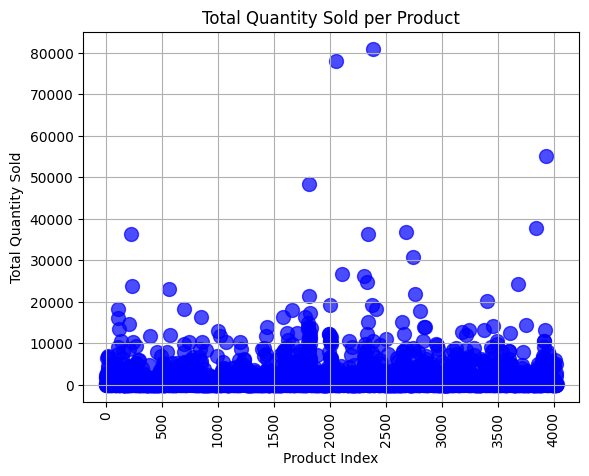

In [ ]:
plt.scatter(quantity_per_Product.index, quantity_per_Product["Quantity"], color='blue', marker='o', s=100, alpha=0.7)
plt.xlabel('Product Index')
plt.ylabel('Total Quantity Sold')
plt.title('Total Quantity Sold per Product')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### Display the above information as Bar plot

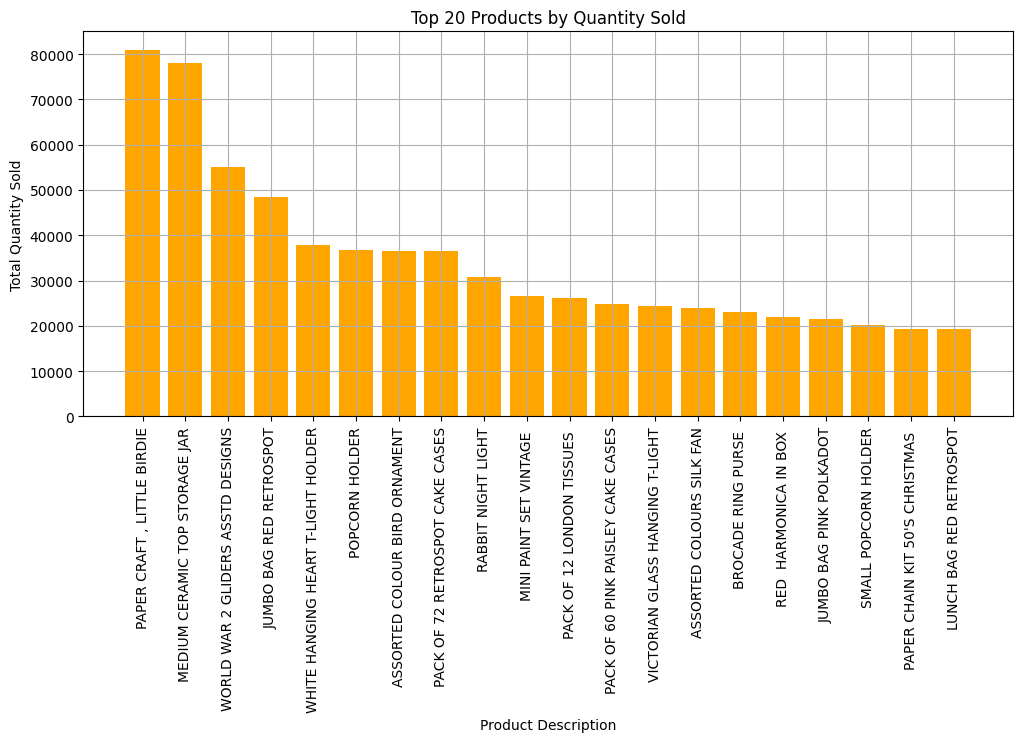

In [ ]:
plt.figure(figsize=(12, 5))
plt.bar(quantity_per_Product["Description"][:20], quantity_per_Product["Quantity"][:20], color='orange')  # Display top 20 for better readability
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.title('Top 20 Products by Quantity Sold')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

PAPER CRAFT , LITTLE BIRDIE,MEDIUM CERAMIC TOP STORAGE JAR,WORLD WAR 2 GLIDERS ASSTD DESIGN, Those products are the top 3 Number of quantity Sold Product.

### Find which invoice has maximum number of Products

In [ ]:
Product_count_per_invoice =df.groupby('InvoiceNo')["Quantity"].sum().sort_values(ascending=False)
Product_count_per_invoice

InvoiceNo
581483    80995
541431    74215
556917    15049
563076    14730
574941    14149
          ...  
575162        1
574309        1
573933        1
573586        1
573669        1
Name: Quantity, Length: 19960, dtype: int64

### Display the above information as Bar plot

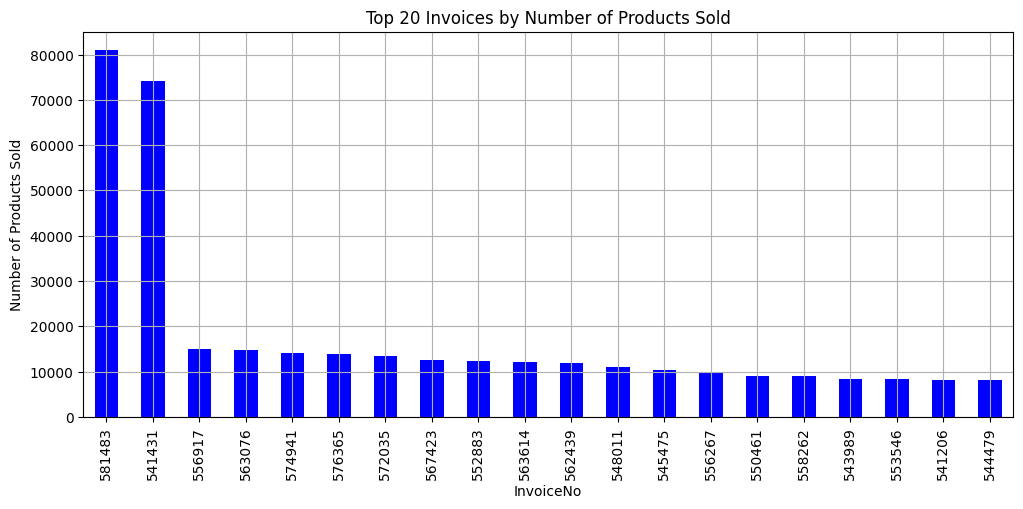

In [ ]:
plt.figure(figsize=(12, 5))
Product_count_per_invoice[:20].plot(kind='bar', color='blue')  # Display top 20 invoices
plt.xlabel('InvoiceNo')
plt.ylabel('Number of Products Sold')
plt.title('Top 20 Invoices by Number of Products Sold')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

InvoiceNo: 581483 has maximum number of Products are Sold

### Identify the top 10 customers who have made the highest number of product purchases

In [ ]:
Product_count_per_customer=df.groupby('CustomerID')["Quantity"].sum().sort_values(ascending=False)
Product_count_per_customer.head(10)

CustomerID
14646.0    196915
16446.0     80997
14911.0     80265
12415.0     77374
12346.0     74215
17450.0     69993
17511.0     64549
18102.0     64124
13694.0     63312
14298.0     58343
Name: Quantity, dtype: int64

### Display the above information with Bar plot





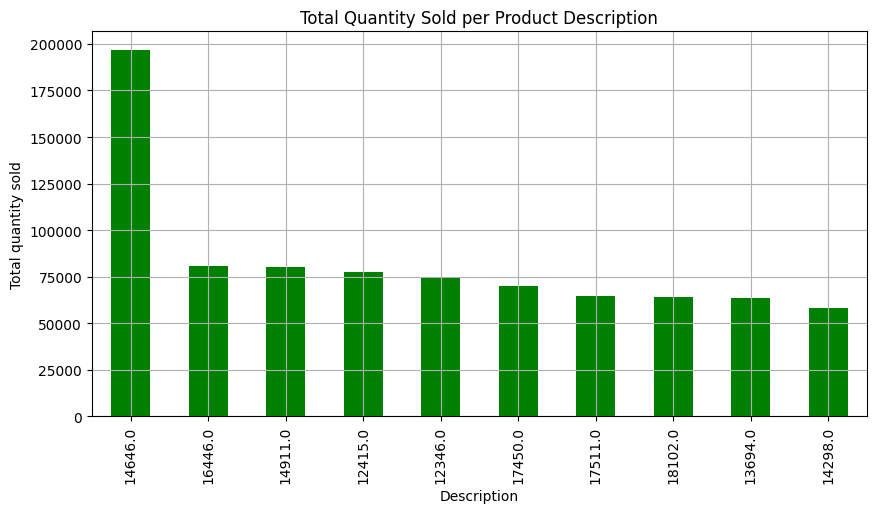

In [ ]:
plt.figure(figsize=(10, 5))
Product_count_per_customer.head(10).plot(kind='bar', color='green')
plt.xlabel('Description')
plt.ylabel('Total quantity sold')
plt.title('Total Quantity Sold per Product Description')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


The top 10 customers 14646,16446,14911,12415,12346,17450,17511,18102,13694,14298 have made the highest number of product purchases.